# Выявление потенциально прибыльных игр для интернет-магазина

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План и задачи**
1. Подготовить данные


2. Провести исследовательский анализ данных:

- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. 
- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Выбрать данные за соответствующий актуальный период.
- Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Посмотреть на общее распределение игр по жанрам.

3. Составьте портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

4. Проверить гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### Обзор данных

In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [4]:
# загрузка данных
df = pd.read_csv('/datasets/games.csv')

In [7]:
def first_look(df):
    '''Функция для просмотра основной информации о датафрейме'''
    print('Первые 5 строк датасета:')
    display(df.head())
    print('Информация о датасете:')
    print(df.info())
    print(df.describe())
    print('Количество пропусков:')
    print(df.isna().sum())
    print('Количество дубликатов:')
    print(df.duplicated().sum())

In [8]:
first_look(df)

Первые 5 строк датасета:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество пропусков:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Количество дубликатов:


0

В результате обзора данных выявлены следующие проблемы:
- использование заглавных букв в названиях столбцов, необходимо привести к нижнему регистру;
- неправильный тип данных у некоторых столбцов
- большое количество пропусков, с которыми придется работать

### Предобработка данных

In [5]:
# приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
# смотрим пропуски в столбце названия
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Помимо пропуска названия, очень много пропусков в других важных столбцах, восстановить эти данные невозможно, потому эти 2 строки можно смело удалить.

In [7]:
# удаляем пропуски
df = df.dropna(subset = ['name'])

In [8]:
# просмотрим значения столбца с платформами
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Со столбцом все в порядке.

In [9]:
# смотрим пропуски в столбце года релиза
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# посчитаем, какой процент данных имеет пропуски
len(df[df['year_of_release'].isna()])/len(df)

0.016095255190570215

1,6% - это довольно небольшое значение, потому удалим эти строки.

In [11]:
# удаляем пропуски
df = df.dropna(subset = ['year_of_release'])

In [12]:
# приводим значение года к типу int
df['year_of_release'] = df['year_of_release'].astype('int')

In [13]:
# просмотрим значения в столбце жанра
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Со столбцом все в порядке.

In [14]:
# посмотрим на пропуски в рейтинге ESRB
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Пропусков много, заполним их значением unknown.

In [15]:
# заполняем пропуски
df['rating'] = df['rating'].fillna('unknown')
# посмотрим, какие есть значения рейтинга
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Некотрых значений совсем немного, посмотрим, что вообще эти буковки означают:

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

«K-A» («Kids to Adults») — устаревшее название «E»

Видно, что:
- АО означает примерно то же, что и М;
- RP - это, по сути, отсутствие рейтинга, то есть он неизвестен и можно заменить его значением unknown;
- K-A, EC - примерно то же самое, что и E.

In [16]:
# поменяем значения рейтинга
df.loc[df['rating']=='AO', 'rating'] = 'M'
df.loc[df['rating']=='RP', 'rating'] = 'unknown'
df.loc[df['rating'].isin(['K-A', 'EC']), 'rating'] = 'E'

In [17]:
# проверим, какие значения остались
df['rating'].value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [18]:
# посмотрим на значения в оценках критиков
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Со значениями все в порядке, разброс от 13 до 98, что при 100-балльной системе выглядит логично.

In [19]:
# посмотрим на пропуски в оценках критиков
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown


Пропусков много, восстановить их не представляется возможным, выкинуть эти строки тоже нельзя. Заменим их значением -1, чтобы в дальнейшем иметь возможность без проблем работать с этими данными.

In [20]:
# заполняем пропуски значением -1 и приведем к типу int
df['critic_score'] = df['critic_score'].fillna('-1').astype('int')

In [21]:
# посмотрим на значения в оценках игроков
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

Судя по выводу, у нас тут не числовые значения типа int или float, а строки типа object. Посмотрим, какие значения есть в столбце.

In [22]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.9       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

TBD - To Be Determined, то есть "будет определено в дальнейшем", можно сказать, что это то же самое, что и пропуск. Посмотрим, что это за игры.

In [23]:
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1,tbd,E


In [24]:
# посмотрим, какой процент составляют строки со значением tbd
len(df[df['user_score']=='tbd'])/len(df)

0.14449039163220628

14% - это довольно много, удалять не будем. Лучше заменить значение tbd тем значением, которым мы заполняем пропуски, то есть -1.

In [25]:
# посмотрим на пропуски в оценках игроков
df[df['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,NaN,unknown


In [26]:
# заменим tbd на пропуск, затем заполним пропуск значением -1 и приведем к типу float
df['user_score'] = df['user_score'].replace('tbd', np.NaN).fillna(-1).astype('float')
# просмотрим, какие теперь значения есть в столбце оценок игроков
df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Пропуски устранены, все значения вполне логичны.

In [27]:
# посчитайте суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
# просмотрим информацию о обновленном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

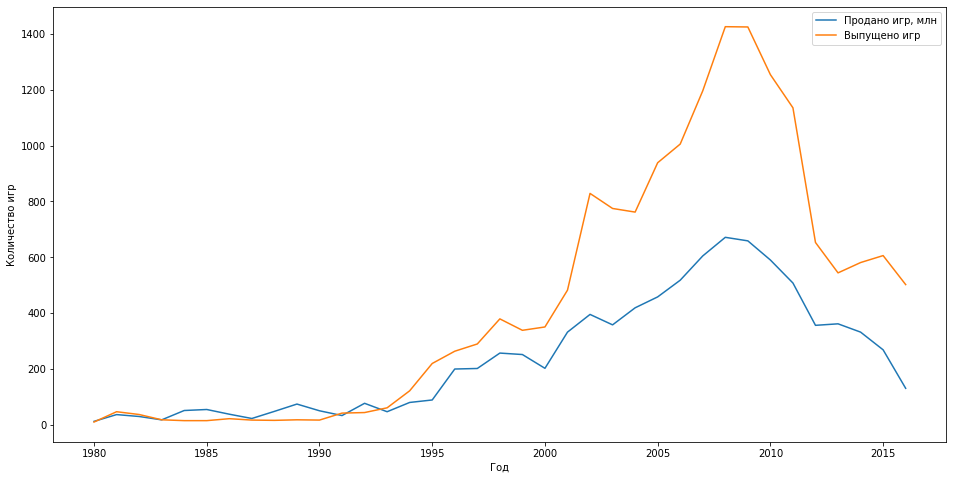

In [29]:
# построим сводные таблицы - с количеством выпущенных игр и с количеством продаж
released_years = df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count')
sales_years = df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
# чтобы оценить динамику, построим график, который покажет, сколько игр было выпущено в разные годы
plt.figure(figsize = (16, 8))
plt.plot(sales_years, label = 'Продано игр, млн')
plt.plot(released_years, label = 'Выпущено игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

**Вывод**: на графике видно, что до 1995 года выходило крайне малое количество игр, что вполен логично - рынок только начинал развиваться. После этого происходит эдакий "бум", количество выпущенных и проданных игр растет с бешеной скоростью. Этот рост продолжается вплоть до примерно 2010 года, после которого количество релизов падает примерно в три раза, а количество продаж - во все четыре.
Причин этого несколько: примерно в 2010 произошел другой "бум", а именно невероятный рост популярности различных социальных сетей, что стало новым виртулальным развлечением и потеснило видеоигры. Кроме того, бюджет видеоигр, а, соответсвенно, и их стоимость на рынке, постоянно растет, и многие компании предпочитают выпустить один крупный дорогой проект вместо нескольких дешевых. Не стоит забывать об условно-бесплатных играх, которые один раз выходят и в дальнейшем постоянно обновляются, на что требуются постоянные усилия разработчиков, которые сосредоточены на поддержке старой игры вместо разработки новой - такой способ монетизации и распространения игр также стал популярен примерно в 2010 году.

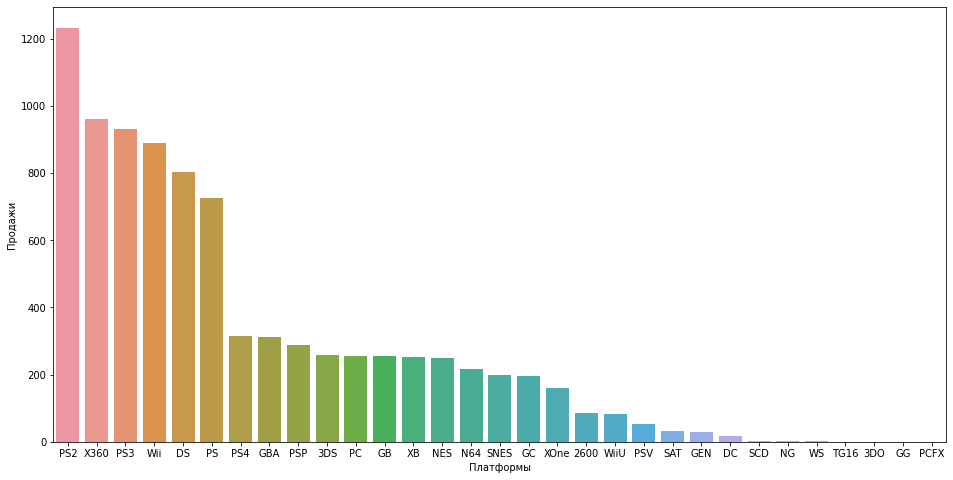

In [30]:
# посмотрим на продажи по платформам
platform_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = 0)
plt.figure(figsize = (16, 8))
sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Посмотрим на распределение по годам самых популярных платформ.

PS2


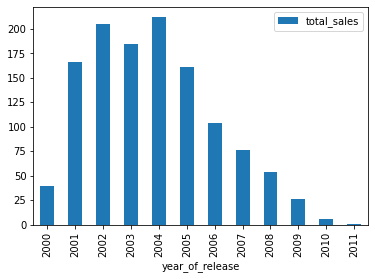

X360


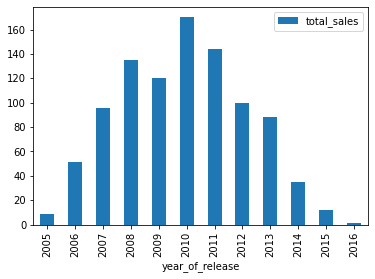

PS3


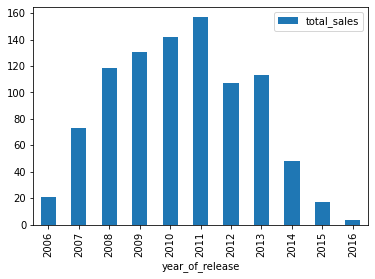

Wii


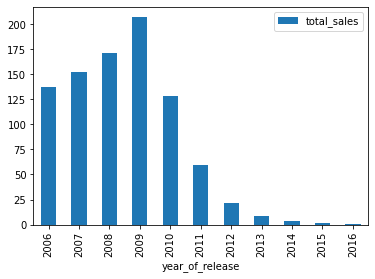

DS


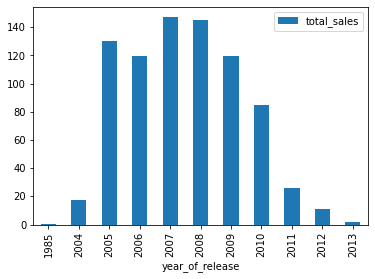

PS


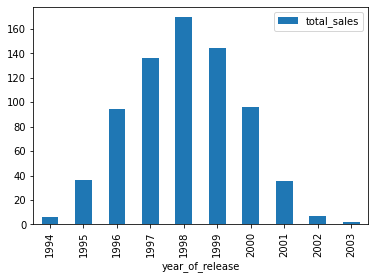

PS4


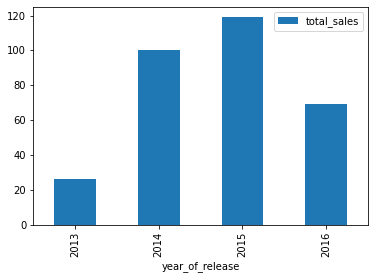

In [32]:
for platform in platform_sales.index[:7]:
    print(platform)
    df.query('platform == @platform').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')
    plt.show()

Странный выброс у платформы DS - она вышла в 2004 году, однако в датасете есть данные об играх на эту платформу в 1985 году. Посмотрим, что это за чудо такое.

In [31]:
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


Ага, такая игра только одна, найти в интернете что-то вменяемое о ней сложно. Скорей всего, она была выпущена для какой-то другой платформы в 1985, а потом перевыпущена для DS. В любом случае, в данной работе нас не сильно волнуют игры 1985 года, но удалять не будем - в дальнейшем все равно будем отсеивать неактуальные устаревшие игры.

Каждая из платформ "прожила" примерно по 10 лет:
- PS2 - с 2000 по 2010 (10 лет)
- X360 - с 2006 по 2015 (9 лет)
- PS3 - c 2006 по 2016 (10 лет)
- Wii - 2006 по 2015 (9 лет)
- DS - с 2004 по 2013 (9 лет)
- PS - с 1994 по 2003 (9 лет)
- PS4 - с 2013 и до наших дней

Так нас нас интересует прогноз на 2017 год, то оставим только актуальные данные, за последние 3 года.

In [32]:
games_new = df.query('year_of_release >= 2014')

Посмотрим, какие платформы наиболее актуальны в последние годы.

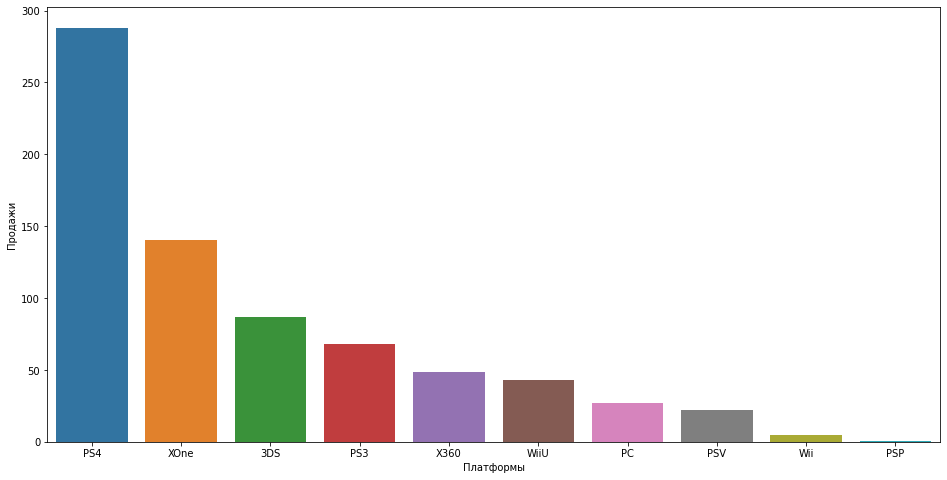

In [33]:
platform_sales_new = games_new.pivot_table(index = 'platform', values = "total_sales", aggfunc = 'sum').sort_values('total_sales', ascending = 0)
plt.figure(figsize = (16, 8))
sns.barplot(data = platform_sales_new, x = platform_sales_new.index, y = 'total_sales').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Ожидаемо, что самые популярные платформы - это самые "свежие" PS4 и Xbox One. Вслед за ними идут уже относительно старенькие 3DS, PS3 и Xbox 360.

PS4


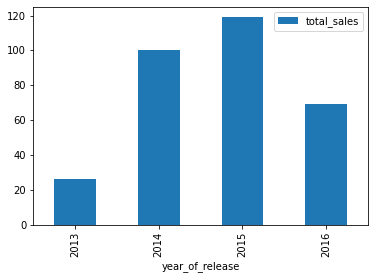

XOne


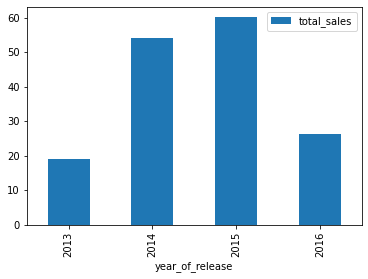

3DS


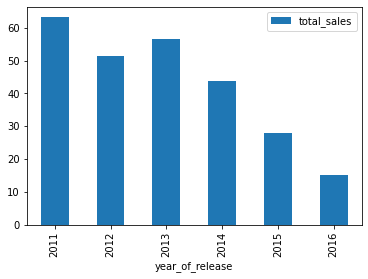

PS3


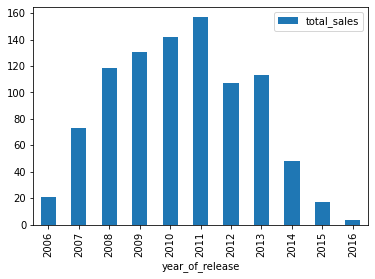

X360


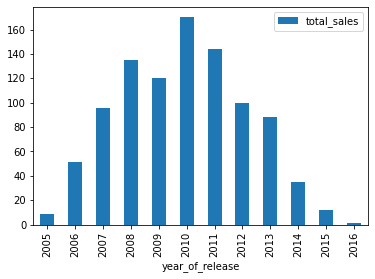

WiiU


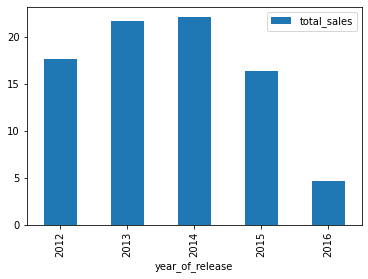

PC


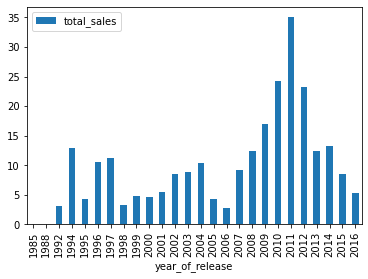

PSV


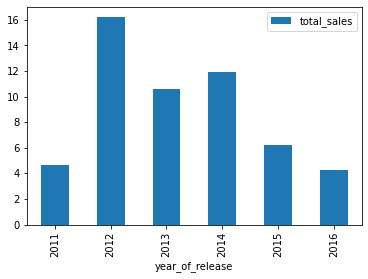

In [34]:
for platform in platform_sales_new.index[:8]:
    print(platform)
    df.query('platform == @platform').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')
    plt.show()

Продажи на Wii и PSP настолько мизерны, что не имеет смысла заниматься анализом игр на этих платформах.

In [35]:
# исключим неинтересующие нас платформы
games_new = games_new.query('platform not in ["Wii", "PSP"]')

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

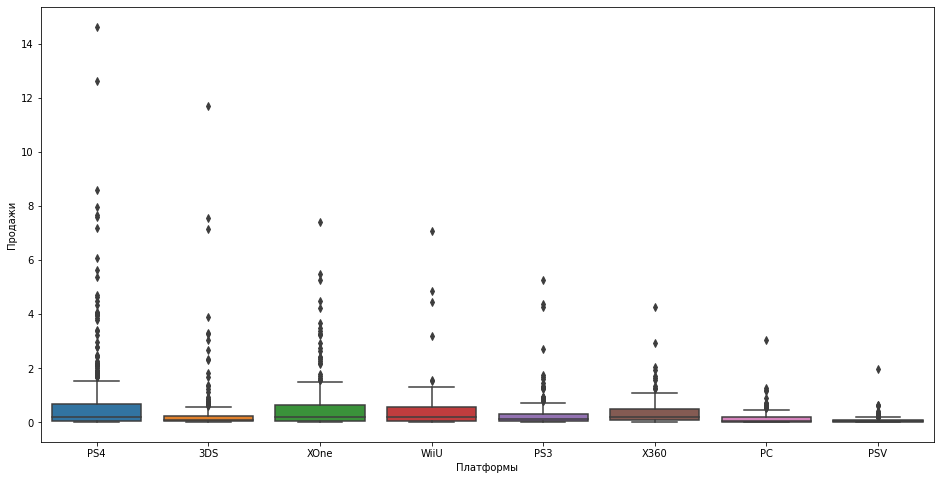

In [37]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = games_new, y = 'total_sales', x='platform').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

По такому графику тяжело что-то сказать, "приблизим" его, убрав выбросы в виде игр, общие продажи которых больше миллиона.

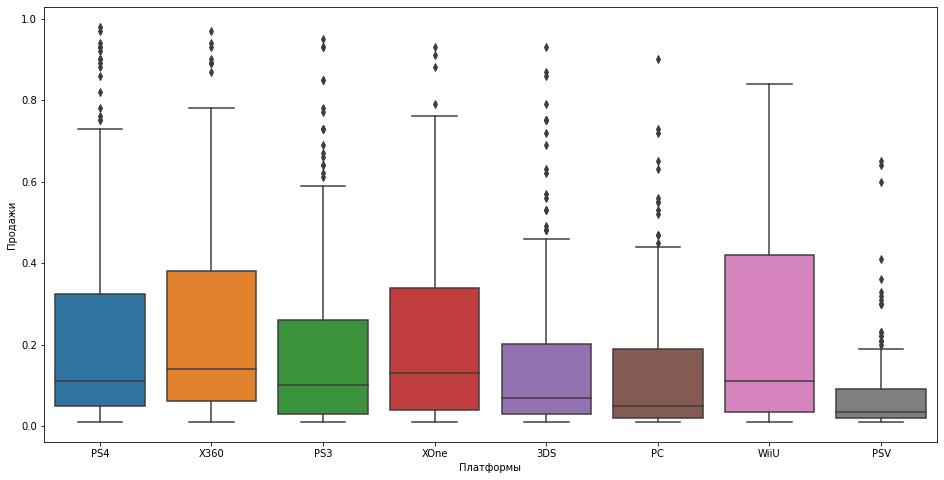

In [38]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = games_new.query('total_sales < 1'), y = 'total_sales', x='platform').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Наибольшие медианные продажи - у компании Microsoft с их Xbox 360 и Xbox One. Вслед за ними идут их конкуренты от Sony - PS3 и PS4, а также платформа WiiU. Кроме того, видно, что абсолютно у всех платформ есть выбросы - это игры, которые "выстрелили" и продались миллионами.

Посмотрим, есть ли зависимость успешности игры от оценок критиков и игроков.

PS4


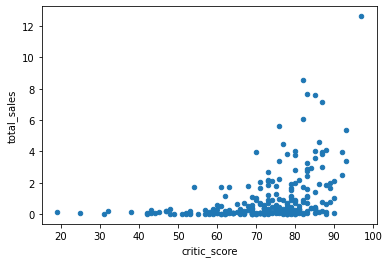

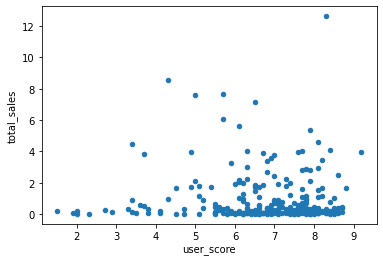

total_sales     1.000000
critic_score    0.405895
user_score     -0.033625
Name: total_sales, dtype: float64
------------------------------
XOne


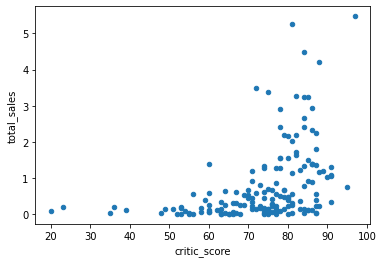

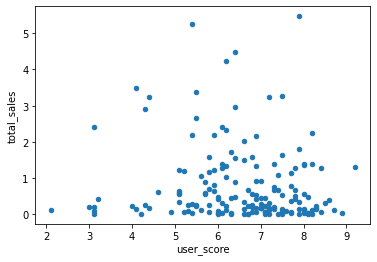

total_sales     1.000000
critic_score    0.410422
user_score     -0.094003
Name: total_sales, dtype: float64
------------------------------
3DS


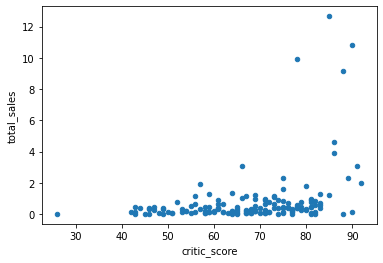

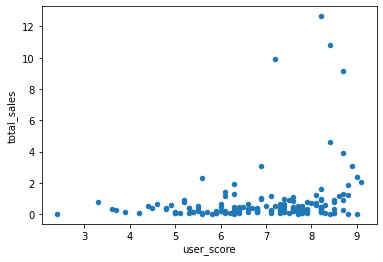

total_sales     1.000000
critic_score    0.338904
user_score      0.232089
Name: total_sales, dtype: float64
------------------------------
PS3


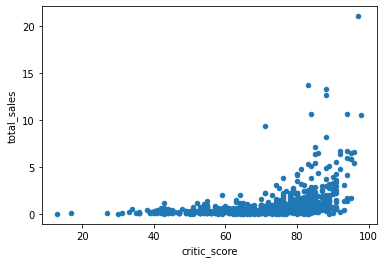

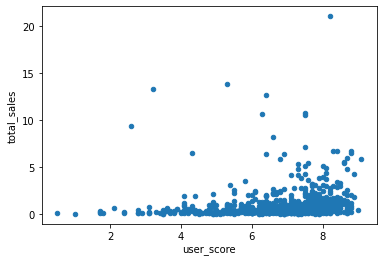

total_sales     1.000000
critic_score    0.428213
user_score      0.143978
Name: total_sales, dtype: float64
------------------------------
X360


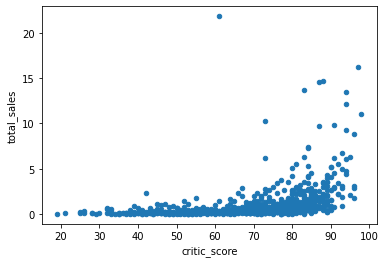

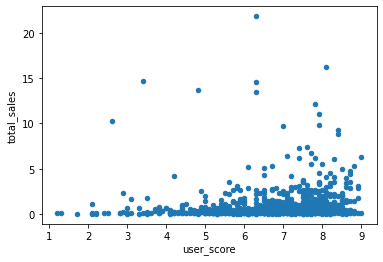

total_sales     1.000000
critic_score    0.388992
user_score      0.110280
Name: total_sales, dtype: float64
------------------------------
WiiU


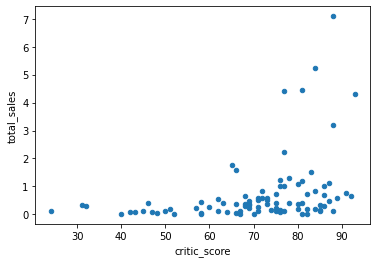

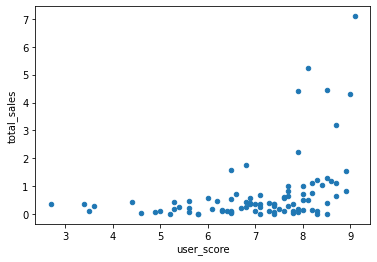

total_sales     1.000000
critic_score    0.350882
user_score      0.391848
Name: total_sales, dtype: float64
------------------------------
PC


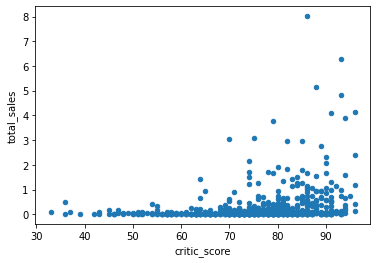

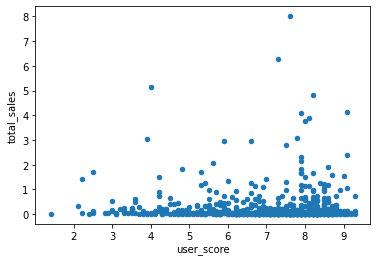

total_sales     1.000000
critic_score    0.257261
user_score      0.003596
Name: total_sales, dtype: float64
------------------------------
PSV


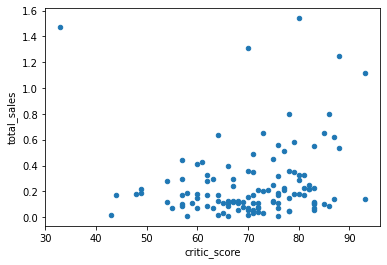

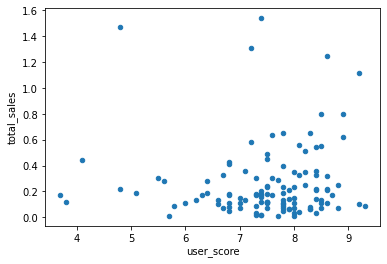

total_sales     1.000000
critic_score    0.131619
user_score      0.038380
Name: total_sales, dtype: float64
------------------------------
Wii


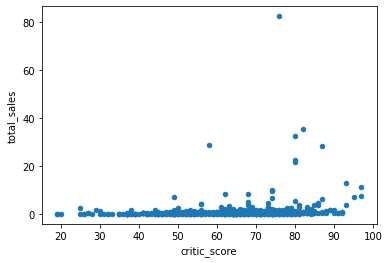

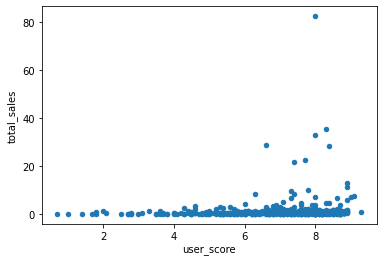

total_sales     1.000000
critic_score    0.170855
user_score      0.110637
Name: total_sales, dtype: float64
------------------------------
PSP


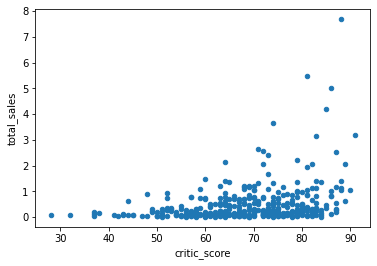

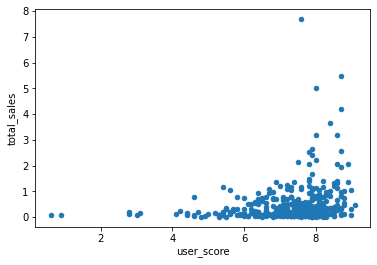

total_sales     1.000000
critic_score    0.299717
user_score      0.232711
Name: total_sales, dtype: float64
------------------------------


In [39]:
for platform in platform_sales_new.index:
    print(platform)
    game = df.query('platform == @platform & user_score != -1 & critic_score != -1')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
    game.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')
    game.plot(kind = 'scatter', x = 'user_score', y = 'total_sales')
    plt.show()
    print(game.corr()['total_sales'])
    print('-'*30)

**Вывод:** небольшая корреляция между оценками критиков и продажами есть - признание критиков заставляет игроков слегка активнее покупать игру. А вот зависимости продаж от оценки игроков нет.

Посмотрим на общее распределение игр по жанрам.

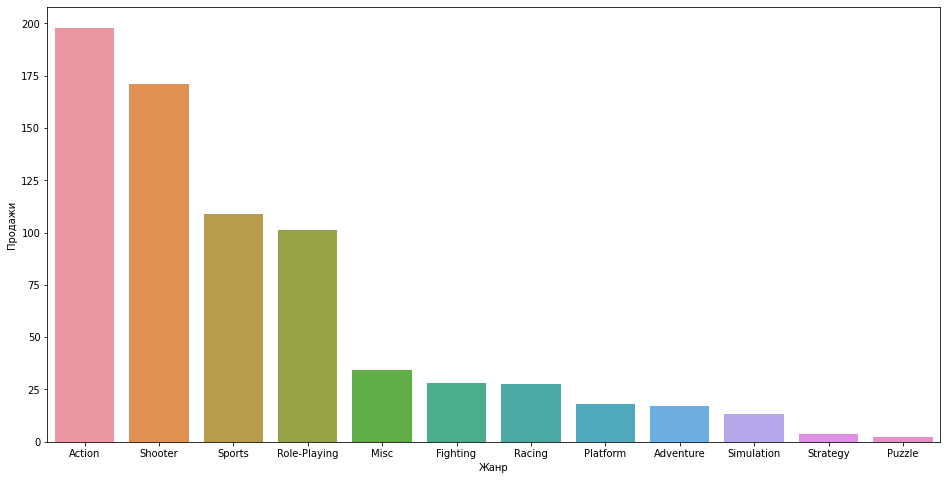

In [40]:
genre = games_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = 0)
plt.figure(figsize = (16, 8))
sns.barplot(data = genre, x = genre.index, y = 'total_sales').set(xlabel = 'Жанр', ylabel = 'Продажи')
plt.show()

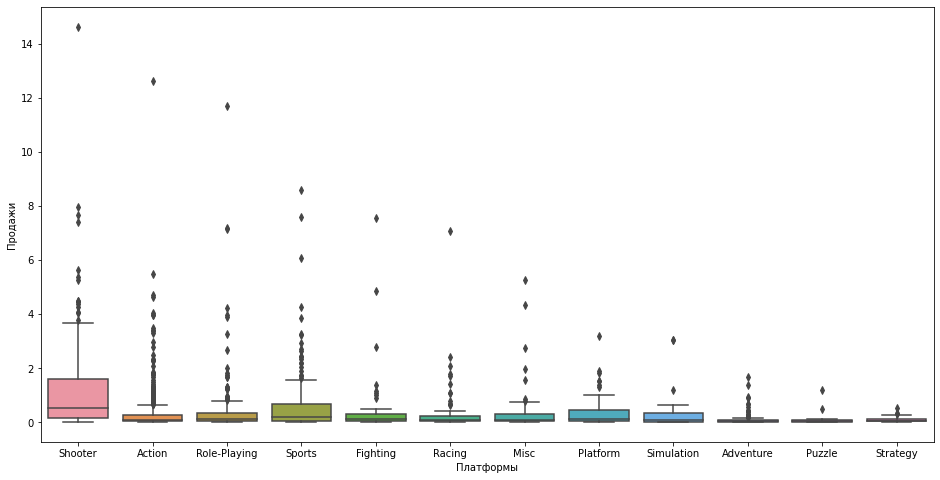

In [41]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = games_new, y = 'total_sales', x='genre').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Приблизим график, чтобы получше рассмотреть медиану и квартили.

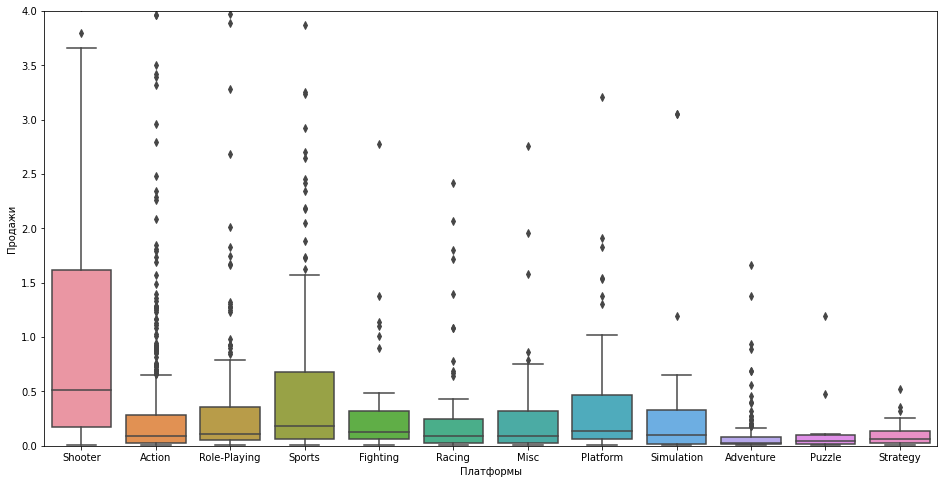

In [45]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = games_new, y = 'total_sales', x='genre').set(xlabel = 'Платформы', ylabel = 'Продажи')
plt.ylim([0, 4])
plt.show()

Как видно из диаграмм размаха, наибольшее медианное значение, а также 75 квартиль - у шутеров. Также именно наибольший выброс по продажам - более 14 млн - именно у игры этого жанра. Интересная ситуация с экшенами - хоть медианное значение, равно как и 75 квартиль, не очень высоки, однако именно у этого жанра наибольшее количество крайне успешных игр, которые хорошо продаются.

**Вывод:** наиболее популярными жанрами оказались "динамичные" игры - экшен, шутеры, спортивные и РПГ. А вот игры, требующие усидчивости и "шевеления мозгами", вроде стратегий и головоломок, у народа нынче не в почете.

### Портрет пользователя каждого региона

Посмотрим на самые популярные платформы в каждом регионе - Европе, Америке и Японии.

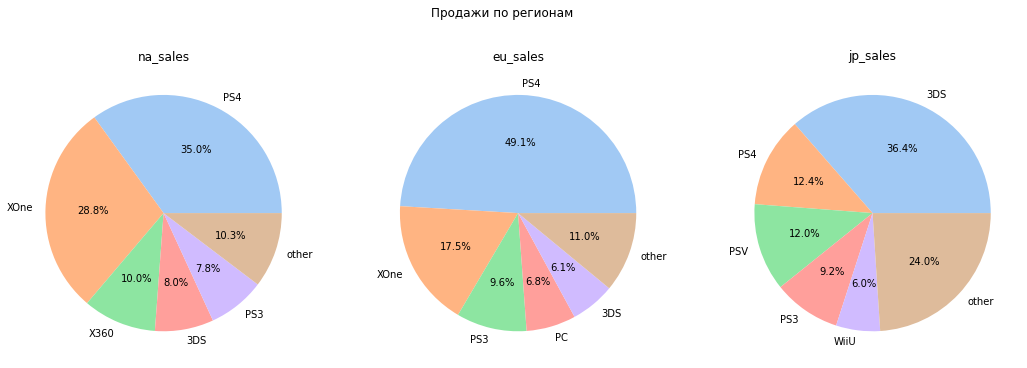

In [85]:
popular_platforms = {}
region = games_new.columns[4:7]
for country in region:
    popular_platforms[country] = games_new.groupby('platform')[country].sum().sort_values(ascending=False).head(5)
    popular_platforms[country]['other'] = games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).tail(-5).sum()

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))
fig.suptitle('Продажи по регионам')

x = [ax1, ax2, ax3]


for i in range(3):
    ax = x[i]
    ax.set_title(region[i])
    ax.pie(popular_platforms[region[i]].values, labels = popular_platforms[region[i]].index, autopct = '%1.1f%%', colors = sns.color_palette('pastel')) 

plt.show()

**Вывод:** самая популярная платформа во всех регионах одинакова - это PS4, однако в Америке Xbox One дышит своему конкуренту в спину.

Теперь посмотрим, какие жанры предпочитают американцы, европейцы и японцы.

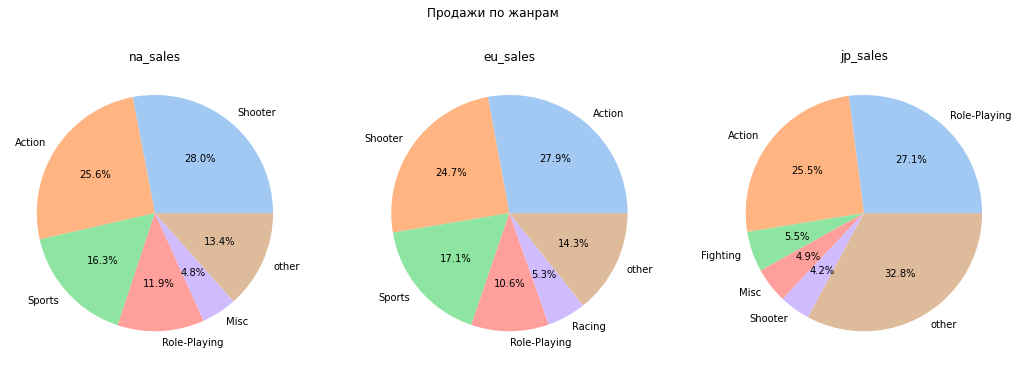

In [86]:
popular_genres = {}
for country in region:
    popular_genres[country] = games_new.groupby('genre')[country].sum().sort_values(ascending=False).head(5)
    popular_genres[country]['other'] = games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).tail(-5).sum()

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))
fig.suptitle('Продажи по жанрам')

x = [ax1, ax2, ax3]

for i in range(3):
    ax = x[i]
    ax.set_title(region[i])
    ax.pie(popular_genres[region[i]].values, labels = popular_genres[region[i]].index, autopct = '%1.1f%%', colors = sns.color_palette('pastel')) 

plt.show()

А вот тут уже есть заметные отличия:
- В Америке самый популярный жанр - шутер, а экшен чуть ему уступает, на третьем месте - спортивные игры.
- В Европе схожая ситуация - экшен на первом, а шутер на втором месте, за ними идет спорт.
- У японцев же самый популярный жанр - это РПГ, хотя и экшн не сильно отстает, а вот шутеры и игры про спорт в стране восходящего солнца не жалуют.

Посмотрим, на какую возрастную категорию рассчитаны рассчитаны популярные игры в каждом регионе.

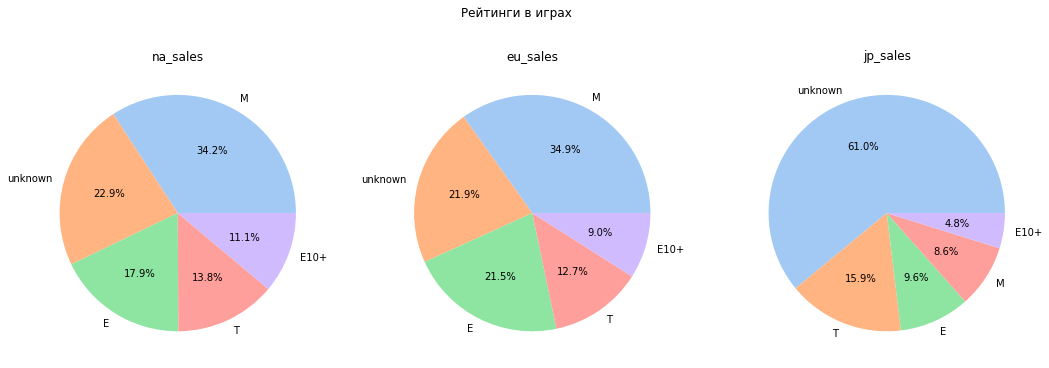

In [87]:
popular_rating = {}
for country in region:
    popular_rating[country] = games_new.groupby('rating')[country].sum().sort_values(ascending=False).head(5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))
fig.suptitle('Рейтинги в играх')

x = [ax1, ax2, ax3]

for i in range(3):
    ax = x[i]
    ax.set_title(region[i])
    ax.pie(popular_rating[region[i]].values, labels = popular_rating[region[i]].index, autopct = '%1.1f%%', colors = sns.color_palette('pastel')) 

plt.show()

Интересная получается картинка - в большинстве своем европейцы и американцы предпочитают игры с рейтингом М, то есть для взрослых, затем идут игры "для всех". По Японии выводы делать сложно, так как очень много игр с неизвестным рейтингом - аж 61%.


### Проверка гипотез

**Гипотеза №1**

**H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1**: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [44]:
games_with_score = games_new[games_new['user_score']!=-1]

print(round(games_with_score.query('platform == "XOne"')['user_score'].mean(), 2))
print(round(games_with_score.query('platform == "PC"')['user_score'].mean(), 2))

alpha = 0.05
results = st.ttest_ind(games_with_score.query('platform == "XOne"')['user_score'],
                       games_with_score.query('platform == "PC"')['user_score'], equal_var=0)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.59
6.3
p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе 1:** высокое p-value говорит о том, что отвергнуть нулевую гипотезу нельзя отвергнуть, то есть различие между средним наших выборок может быть случайно.

**Гипотеза №2**

**H0**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы.

**H1**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [45]:
print(round(games_with_score.query('genre == "Action"')['user_score'].mean(), 2))
print(round(games_with_score.query('genre == "Sports"')['user_score'].mean(), 2))

alpha = 0.05
results = st.ttest_ind(games_with_score.query('genre == "Action"')['user_score'],
                       games_with_score.query('genre == "Sports"')['user_score'], equal_var=0)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.76
5.23
p-значение: 2.132579125573844e-14
Отвергаем нулевую гипотезу


**Вывод по гипотезе 2:** низкое p-value говорит о том, что нулевую гипотезу можно смело отвергать, то есть средние пользовательские рейтинги жанров Action и Sports действительно отличаются.

### Общий вывод

**Обработка данных**
- Названия столбцов приведены к нижнему регистру, были заполнены некоторые пропуски, обработаны редкие и неизвестные значения в столбцах рейтинга игр и оценок.
- Многие пропуски были заполнены значением-заглушкой -1.
- Было посчитано общее количество продаж по всем регионам, результат записан в столбец total_sales.

**Исследовательский анализ данных**
- Было обнаружено, что резкий рост выпуска игр приходится на 1995 год, пик - на 2008-2009 гг, после чего пошел спад, по крайней мере в количестве релизов и продаж.
- Характерный срок жизни платформы - 10 лет.
- Наибольшие медианные продажи у Xbox 360, Xbox One, PS3, PS4, WiiU.
- Почти у всех платформ есть определенные игры, которые "выстрелили".
- Оценки критиков слабо, но все-таки влияют на общие продажи, оценки пользователей не влияют совсем.
- Наиболее популярне жанры - экшен, шутеры, спортивные и РПГ.
- Самые непопулярные жанры - головоломки и стратегии.

**Портрет пользователя региона**
- Cамая популярная платформа во всех регионах одинакова - это PS4.
- Любимые жанры во всех регионах разные: в Америке - шутер, а экшен чуть ему уступает, в Европе - экшен, в Японии - РПГ.
- Американцы и европейцы предпочитают игры с рейтингом М, а вот про япоцев сложно что-то сказать.

**Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу отвергаем.
- Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза не отвергаем.